In [1]:
from sklearn.tree import DecisionTreeRegressor
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import sys

sys.path.append("../")
from sklearn.metrics import r2_score
import matplotlib.dates as mdates
import matplotlib as mpl
import os
import seaborn as sns
import shap
from scipy.optimize import curve_fit
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

In [2]:

import pandas as pd
import numpy as np
from typing import List, NamedTuple

import matplotlib as mpl
from matplotlib import pyplot as plt
import matplotlib.dates as mdates
import os
from scipy.optimize import curve_fit
from mpl_toolkits.axes_grid1.inset_locator import inset_axes


import properscoring as ps
# import CRPS.CRPS as pscore # usage: crps,fcrps,acrps = pscore(np.arange(1,11),8.3,50).compute()

import sys

sys.path.append("./")
sys.path.append("..")

In [3]:
data_folder = "../data/2020-2024/{}/"
version_folder = "../data/2020-2024/{}/version_{}/"
fit_folder = "../results/model_fit/{}/version_{}/target_{}/"
figure_path = "../results/figures/"

files = {
    "CE": "TransnetBW/cleansed_2020-01-01_to_2023-12-31.h5",
    "Nordic": "Fingrid/cleansed_2020-01-01_to_2023-12-31.h5",
}

targets = ["f_rocof", "f_ext", "f_msd", "f_integral"]
target_names = ["RoCoF", "Nadir", "MSD", "Integral"]

In [4]:
input_cols = [
    "gen_other",
    "gen_solar",
    "gen_wind_on",
    "gen_waste",
    "gen_nuclear",
    "gen_biomass",
    "gen_gas",
    "gen_run_off_hydro",
    "gen_oil",
    "gen_pumped_hydro",
    "gen_other_renew",
    "gen_reservoir_hydro",
    "gen_hard_coal",
    "gen_wind_off",
    "gen_geothermal",
    "gen_lignite",
    "load",
    "gen_coal_gas",
    "total_gen",
    "synchronous_gen",
    "load_ramp",
    "total_gen_ramp",
    "other_ramp",
    "solar_ramp",
    "wind_on_ramp",
    "waste_ramp",
    "nuclear_ramp",
    "biomass_ramp",
    "gas_ramp",
    "run_off_hydro_ramp",
    "oil_ramp",
    "pumped_hydro_ramp",
    "other_renew_ramp",
    "reservoir_hydro_ramp",
    "hard_coal_ramp",
    "wind_off_ramp",
    "geothermal_ramp",
    "lignite_ramp",
    "coal_gas_ramp",
    "forecast_error_wind_on",
    "forecast_error_wind_off",
    "forecast_error_solar",
    "forecast_error_total_gen",
    "forecast_error_load",
    "forecast_error_load_ramp",
    "forecast_error_total_gen_ramp",
    "forecast_error_wind_off_ramp",
    "forecast_error_wind_on_ramp",
    "forecast_error_solar_ramp",
    "solar_day_ahead",
    "wind_on_day_ahead",
    "scheduled_gen_total",
    "prices_day_ahead",
    "load_day_ahead",
    "wind_off_day_ahead",
    "month",
    "weekday",
    "hour",
    "load_ramp_day_ahead",
    "total_gen_ramp_day_ahead",
    "wind_off_ramp_day_ahead",
    "wind_on_ramp_day_ahead",
    "solar_ramp_day_ahead",
    "price_ramp_day_ahead",
    "gen_fossil_peat",
    "fossil_peat_ramp",
    "residual",
]


input_col_names = [
    "Generation other",
    "Solar generation",
    "Onshore wind generation",
    "Waste generation",
    "Nuclear generation",
    "Biomass generation",
    "Gas generation",
    "Run-off-river hydro generation",
    "Oil generation",
    "Pumped hydro generation",
    "Other renewable generation",
    "Reservoir hydro generation",
    "Hard coal generation",
    "Wind offshore generation",
    "Geothermal generation",
    "Lignite generation",
    "Load",
    "Coal gas generation",
    "Total generation",
    "Synchronous generation",
    "Load ramp",
    "Total generation ramp",
    "Other ramp",
    "Solar ramp",
    "Onshore wind ramp",
    "Waste ramp",
    "Nuclear ramp",
    "Biomass ramp",
    "Gas ramp",
    "Run-off-river hydro ramp",
    "Oil ramp",
    "Pumped hydro ramp",
    "Other renewable ramp",
    "Reservoir hydro ramp",
    "Hard coal ramp",
    "Offshore wind ramp",
    "geothermal_ramp",
    "Lignite ramp",
    "Coal gas ramp",
    "Forecast error onshore wind",
    "Forecast error offshore wind",
    "Forecast error solar",
    "Forecast error total generation",
    "Forecast error load",
    "Forecast error load ramp",
    "Forecast error generation ramp",
    "Forecast error offshore wind ramp",
    "Forecast error onshore wind ramp",
    "Forecast error solar ramp",
    "Solar day-ahead",
    "Onshore wind day-ahead",
    "Scheduled generation",
    "Prices day-ahead",
    "Load day-ahead",
    "Offshore wind day-ahead",
    "Month",
    "Weekday",
    "Hour",
    "Load ramp day-ahead",
    "Generation ramp day-ahead",
    "Offshore wind ramp day-ahead",
    "Onshore wind ramp day-ahead",
    "Solar ramp day-ahead",
    "Price ramp day-ahead",
    "Fossil peat generation",
    "Fossil peat ramp",
    "Residual",
]

In [5]:
class Config(NamedTuple):
    data_version: str = "2024-05-19"
    res_version: str = "2024-06-24"
    model_type: str = "_full"
    model_combination: str = "ngb"
    predictors_prob: List[str] = ["baseline", "predictions"]
    model_names_prob: List[str] =["Baseline", "NGBoost (full model)"],
    model_names_det: List[str] =["Daily profile", "NGBoost (full model)"],    
    predictors_det: List[str] = ["daily_profile", "predictions"]
    scaler_str: str = "yeo_johnson"
    scaled: str = "_scaled"  # if using the scaled data, use "_scaled as the string" otherwise use the empty string



config_ngb = Config()

config_xgboost_old = Config(
    data_version= "2021-07-01_latest",
    res_version = "2021-07-01",
    model_combination= "xgb_latest",
    predictors_det = ["daily_profile", "predictions"],
    model_names_det = ["Daily profile (15-19)", "XGBoost (15-19)"],
    scaler_str = "",
    scaled = "" 

)

config_xgboost_new = Config(
    res_version = "2024-05-19",
    model_combination= "xgb",
    predictors_det = ["daily_profile", "predictions"],
    model_names_det = ["Daily profile (20-23)", "XGBoost (20-23)"],
    scaler_str = "",
    scaled = "" 

)

config_xgboost = Config(
    res_version = "2024-05-19",
    model_combination= "xgb",
    predictors_det = ["daily_profile", "predictions"],
    model_names_det = ["Daily profile", "XGBoost"],
    scaler_str = "",
    scaled = "" 

)

config_tabnet = Config(
    res_version="2024-07-20",
    model_combination="tabnet_tuner",
    model_names_det=["Daily profile", "TabNet"],
)

config_tabnet_det = Config(
    res_version="2024-09-20",
    model_combination="tabnet_det_rs",
    model_names_det=["Daily profile", "TabNetDet"],
)

config_tabnet_proba = Config(
    res_version="2024-08-27",
    model_combination="tabnet_proba_final",
    model_names_det=["Daily profile", "TabNetProba"],
)

targets = ["f_rocof", "f_ext", "f_msd", "f_integral"]
target_names = ["RoCoF", "Nadir", "MSD", "Integral"]
areas = ["CE", "Nordic"]
area_names = ["Continental Europe", "Nordic"]
area_colors = ["C0", "C1"]

In [7]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
#import shap

# Set LaTeX for rendering text in Matplotlib
plt.rcParams['text.usetex'] = False
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
# Enable LaTeX text rendering and set a larger default font size
#plt.rc('text', usetex=True)
plt.rc('font', family='serif', size=16)  # Increase font size
plt.rc('axes', titlesize=20)  # Title font size
plt.rc('axes', labelsize=18)  # X and Y axis label font size
plt.rc('legend', fontsize=14)  # Legend font size
plt.rc('xtick', labelsize=16)  # X-axis tick label size
plt.rc('ytick', labelsize=16)  # Y-axis tick label size

configs_xgb = [
    config_xgboost_old,
    config_xgboost_new,
]

# Define paths
version_folder = "../data/2020-2024/{}/version_{}/" + config_ngb.scaler_str + "/"
version_folder_xgb_old = "../data/{}/version_{}/"
version_folder_xgb = "../data/2020-2024/{}/version_{}/"

fit_folder_template = (
    "../results/model_fit/{}/version_{}_{}/target_{}/"
)

fig, ax = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

#model_colors = ['#DF9B1B', '#009682', '#4664AA', '#8CB6C3',   '#A22223', '#20b2aa']
model_colors = ["#e60049", "#ffa300",
                #"#50e991", "#e6d800", 
                "#9b19f5", "#0bb4ff",  "#dc0ab4", "#b3d4ff", "#00bfa0"]
    
for i, area in enumerate(areas):
    scores = pd.DataFrame(
        index=targets,
        columns=[f"{config.model_combination}" for config in configs_xgb].append(
            "daily_profile"
        ),
        dtype="float",
    )

    for m, config in enumerate(configs_xgb):
        for j, targ in enumerate(targets):
            try:
                if m == 0: # then this is xgboost old
                    y_test = pd.read_hdf(
                    version_folder_xgb_old.format(area, config.data_version)
                    + f"y_test.h5"
                    ).loc[:, targ]
                else:
                    y_test = pd.read_hdf(
                    version_folder_xgb.format(area, config.data_version)
                    + f"y_test.h5"
                    ).loc[:, targ]
                
                fit_folder = fit_folder_template.format(
                    area,
                    config.res_version,
                    config.model_combination,
                    targ,
                )
                #print(fit_folder)
                y_pred = pd.read_hdf(fit_folder + "y_pred.h5")
                
                y_pred.rename(columns={"gtb_full": "predictions"}, inplace=True)
                if m == 0:
                    scores.loc[targ, "daily_profile_old"] = r2_score(
                        y_test, y_pred["daily_profile"]
                    )
                else:
                    scores.loc[targ, "daily_profile"] = r2_score(
                        y_test, y_pred["daily_profile"]
                    )
                
                    
                scores.loc[targ, f"{config.model_combination}"] = r2_score(
                    y_test, y_pred["predictions"]
                )
            except Exception as e:
                print(e)
                print(
                    f"Error processing {config.model_combination} for {targ} in {area}: {e}"
                )
                continue

    # Replace NaN values with a placeholder (e.g., 0) for plotting
    scores = scores.fillna(0)
    print(scores)
    scores.rename(columns={"daily_profile": "Daily Profile ('20-'23)", "xgb_latest": "XGBoost ('15-'19)", "xgb":"XGBoost ('20-'23)", 
                          "daily_profile_old": "Daily Profile ('15-'19)"}, inplace=True)
    scores.plot.bar(
        ylim=[-0.02, scores.max().max() + 0.05],
        width=0.85,
        ax=ax[i],
        legend=False,
        color=model_colors,
    )
    ax[i].set_xticks(np.arange(len(targets)))
    ax[i].set_xticklabels(target_names, rotation=30, ha="right")
    ax[i].grid(axis="y")
    ax[i].set_title(area_names[i])

    relative_increase = scores.div(scores.iloc[:, 0], axis=0)
    """
    for j, targ in enumerate(targets):
        try:
            ml_gain = relative_increase.loc[targ].max()
            perf_val = scores.loc[targ, relative_increase.loc[targ].idxmax()]
            ax[i].annotate(
                r"$\times$ {:.1f}".format(ml_gain),
                (j - i * 0.1 - 0.2, perf_val + 0.015),
                fontsize=8,
                c=shap.plots.colors.gray_rgb,
                fontweight="bold",
            )
        except Exception as e:
            print(f"Error annotating {targ} in {area}: {e}")
            continue
    """

ax[0].set_ylabel(r"R$^2$ Score")  # LaTeX for R^2
ax[0].set_ylim([-0.01, 0.82])
ax[0].set_yticks(np.arange(0, 1.1, 0.2))  # Set y-axis ticks in 0.2 steps
ax[1].set_yticks(np.arange(0, 1.1, 0.2))  # Set y-axis ticks in 0.2 steps
plt.tight_layout()

leg1 = ax[1].legend(bbox_to_anchor=(0.43, -0.2), ncol=2, title=r"Models")  # LaTeX for title
annot_text = plt.plot(
    -10, 0, marker=r"$\times$ 9.9", ms=22, lw=0, c=shap.plots.colors.gray_rgb
)
leg2 = ax[1].legend(
    annot_text, [r"Gain over daily \\ profile"], bbox_to_anchor=(0.9, -0.25)  # LaTeX for annotation
)
ax[1].add_artist(leg1)

plt.savefig("../../results/figures/" + 'r2_score_xgb_old_vs_new.pdf', bbox_inches='tight')
#plt.savefig("../../results/figures/" + 'r2_score_xgb_tabnet.pdf', bbox_inches='tight')

plt.show()


            daily_profile_old  xgb_latest  daily_profile       xgb
f_rocof              0.588274    0.736689       0.507303  0.623512
f_ext                0.220719    0.346098       0.124792  0.220441
f_msd                0.287209    0.465709       0.201139  0.415561
f_integral           0.108767    0.397448       0.134596  0.425935
            daily_profile_old  xgb_latest  daily_profile       xgb
f_rocof              0.294622    0.462451       0.229461  0.353727
f_ext                0.036041    0.273218       0.018596  0.231944
f_msd                0.035061    0.158042       0.026259  0.204477
f_integral           0.058769    0.393231       0.034372  0.372737


RuntimeError: Failed to process string with tex because latex could not be found

Error in callback <function _draw_all_if_interactive at 0x1500eee80> (for post_execute), with arguments args (),kwargs {}:


RuntimeError: Failed to process string with tex because latex could not be found

RuntimeError: Failed to process string with tex because latex could not be found

<Figure size 1200x600 with 2 Axes>

            Daily Profile   XGBoost    TabNet   NGBoost  TabNetProba
f_rocof          0.507303  0.623512  0.609773  0.615228     0.602265
f_ext            0.124792  0.220441  0.143915  0.174084     0.175004
f_msd            0.201139  0.415561  0.520919  0.515488     0.519292
f_integral       0.134596  0.425935  0.265855  0.258696     0.252982
            Daily Profile   XGBoost    TabNet   NGBoost  TabNetProba
f_rocof          0.229461  0.353727  0.312792  0.344702     0.319884
f_ext            0.018596  0.231944  0.201218  0.207141     0.178577
f_msd            0.026259  0.204477  0.189742  0.187304     0.124507
f_integral       0.034372  0.372737  0.331037  0.318184     0.335165


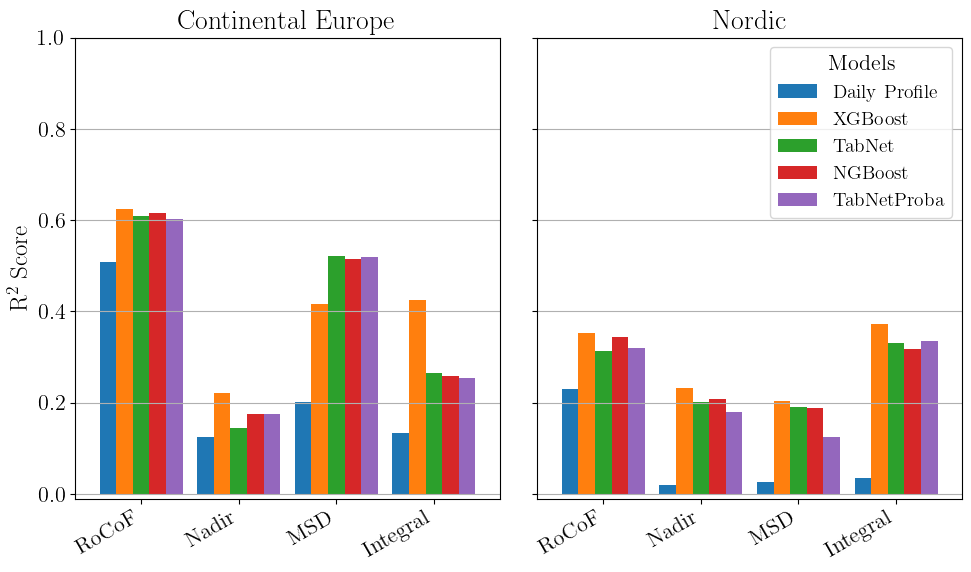

In [21]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
import shap

# Set LaTeX for rendering text in Matplotlib
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
# Enable LaTeX text rendering and set a larger default font size
plt.rc('text', usetex=True)
plt.rc('font', family='serif', size=16)  # Increase font size
plt.rc('axes', titlesize=20)  # Title font size
plt.rc('axes', labelsize=18)  # X and Y axis label font size
plt.rc('legend', fontsize=14)  # Legend font size
plt.rc('xtick', labelsize=16)  # X-axis tick label size
plt.rc('ytick', labelsize=16)  # Y-axis tick label size

configs = [
    config_xgboost,
    config_tabnet,
    config_ngb,
    #config_tabnet_det,
    
    config_tabnet_proba,
]

# Define paths
version_folder = "../data/2020-2024/{}/version_{}/" + config_ngb.scaler_str + "/"
version_folder_xgb = "../data/2020-2024/{}/version_{}/"

fit_folder_template = (
    "../results/model_fit/{}/version_{}_" + "{}" + "/" + "{}" + "/target_{}/"
)

fig, ax = plt.subplots(1, 2, figsize=(10, 6), sharey=True)

#model_colors = ['#DF9B1B', '#009682', '#4664AA', '#8CB6C3',   '#A22223', '#20b2aa']
"""
model_colors = ["#9b19f5", "#0bb4ff",#"#e6d800",
                "#ffa300", "#e60049", "#4A2377",
                #"#50e991", "#e6d800", 
                  #"#dc0ab4", 
                  "#b3d4ff", "#00bfa0"]

model_colors_2 = ["#f9e858", "#003a7d", "#008dff", "#ff73b6", "#b33dc6"]
"""
for i, area in enumerate(areas):
    scores = pd.DataFrame(
        index=targets,
        columns=[f"{config.model_combination}" for config in configs].append(
            "daily_profile"
        ),
        dtype="float",
    )

    for m, config in enumerate(configs):
        for j, targ in enumerate(targets):
            try:
                if m == 0:
                    y_test = pd.read_hdf(
                    version_folder_xgb.format(area, config.data_version)
                    + f"y_test.h5"
                ).loc[:, targ]
                else:
                    y_test = pd.read_hdf(
                        version_folder.format(area, config.data_version)
                        + f"y_test{config.scaled}.h5"
                    ).loc[:, targ]
                fit_folder = fit_folder_template.format(
                    area,
                    config.res_version,
                    config.model_combination,
                    config.scaler_str,
                    targ,
                )
                y_pred = pd.read_hdf(fit_folder + "y_pred.h5")
                if m == 0: # then this is xgboost
                    y_pred.rename(columns={"gtb_full": "predictions"}, inplace=True)
                    scores.loc[targ, "daily_profile"] = r2_score(
                        y_test, y_pred["daily_profile"]
                    )
                else:
                    y_pred.rename(
                        columns={f"{targ}_prediction": "predictions"}, inplace=True
                    )
                    
                scores.loc[targ, f"{config.model_combination}"] = r2_score(
                    y_test, y_pred["predictions"]
                )
            except Exception as e:
                print(e)
                print(
                    f"Error processing {config.model_combination} for {targ} in {area}: {e}"
                )
                continue

    # Replace NaN values with a placeholder (e.g., 0) for plotting
    scores = scores.fillna(0)

    # Use LaTeX for axis labels and titles
    scores.rename(columns={"daily_profile": "Daily Profile", "xgb": "XGBoost", "ngb": "NGBoost", "tabnet_tuner": "TabNet", "tabnet_proba_final":"TabNetProba"}, inplace=True)
    scores.plot.bar(
        ylim=[-0.02, scores.max().max() + 0.05],
        width=0.85,
        ax=ax[i],
        legend=False,
        #color=model_colors_2,
    )
    print(scores)
    ax[i].set_xticks(np.arange(len(targets)))
    ax[i].set_xticklabels(target_names, rotation=30, ha="right")
    ax[i].grid(axis="y")
    ax[i].set_title(area_names[i])

    relative_increase = scores.div(scores.iloc[:, 0], axis=0)

    """
    for j, targ in enumerate(targets):
        try:
            ml_gain = relative_increase.loc[targ].max()
            perf_val = scores.loc[targ, relative_increase.loc[targ].idxmax()]
            ax[i].annotate(
                r"$\times$ {:.1f}".format(ml_gain),
                (j - i * 0.1 - 0.2, perf_val + 0.015),
                fontsize=8,
                c=shap.plots.colors.gray_rgb,
                fontweight="bold",
            )
        except Exception as e:
            print(f"Error annotating {targ} in {area}: {e}")
            continue
    """

ax[0].set_ylabel(r"R$^2$ Score")  # LaTeX for R^2
ax[0].set_ylim([-0.01, 0.82])
ax[0].set_yticks(np.arange(0, 1.1, 0.2))  # Set y-axis ticks in 0.2 steps
ax[1].set_yticks(np.arange(0, 1.1, 0.2))  # Set y-axis ticks in 0.2 steps
plt.tight_layout()

"""
leg1 = ax[1].legend(bbox_to_anchor=(0.38, -0.2), ncol=3, title=r"Models")  # LaTeX for title
annot_text = plt.plot(
    -10, 0, marker=r"$\times$ 9.9", ms=22, lw=0, c=shap.plots.colors.gray_rgb
)
leg2 = ax[1].legend(
    annot_text, [r"Gain over daily \\ profile"], bbox_to_anchor=(0.9, -0.25)  # LaTeX for annotation
)
ax[1].add_artist(leg1)

"""

plt.legend(title=r"Models")
plt.savefig("../../results/figures/" + 'r2_score_overview_proba.pdf', bbox_inches='tight')
#plt.savefig("../../results/figures/" + 'r2_score_xgb_tabnet.pdf', bbox_inches='tight')

plt.show()


In [ ]:
configs_crps = [config_ngb, config_tabnet_proba]

In [47]:
from prettytable import PrettyTable


def read_pretty_table_from_txt(file_path):
    with open(file_path, "r") as file:
        lines = file.readlines()

    # Initialize the PrettyTable
    table = PrettyTable()

    # Skip lines until we find the header line
    header_line_index = 0
    for i, line in enumerate(lines):
        if "-" not in line:
            header_line_index = i
            break

    # Extract headers from the header line
    headers = lines[header_line_index].strip().split("|")
    table.field_names = [header.strip() for header in headers if header.strip()]

    # Extract rows
    for line in lines[
        header_line_index + 2 :
    ]:  # Skip the header line and the separator line
        row = [field.strip() for field in line.strip().split("|") if field.strip()]
        if len(row) == len(table.field_names):
            table.add_row(row)

    return table



file_path_ngb = "../../results/figures/2024-06-24_ngb/yeo_johnson/crps_score.txt"
ngb_table = read_pretty_table_from_txt(file_path_ngb)
ngb_table

file_path_tabnet = "../../results/figures/2024-08-27_tabnet_proba_final/yeo_johnson/crps_score.txt"
tabnet_table = read_pretty_table_from_txt(file_path_tabnet)


In [15]:
crps_table = ngb_table.copy()
crps_table

NameError: name 'ngb_table' is not defined